# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [29]:
# Install the required libraries
# --> Need to activate Dev first
# !pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\forgo\AppData\Local\Temp\ipykernel_5476\1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [5]:
### Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc["2020-05"]
df_may_2020.tail()
# Read the search data into a DataFrame. ---------------------------------------------------------------------------------------------------------------> (5 points)



,Search Trends
Date,
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76
2020-05-31 22:00:00,90
2020-05-31 23:00:00,96


<Axes: xlabel='Date'>

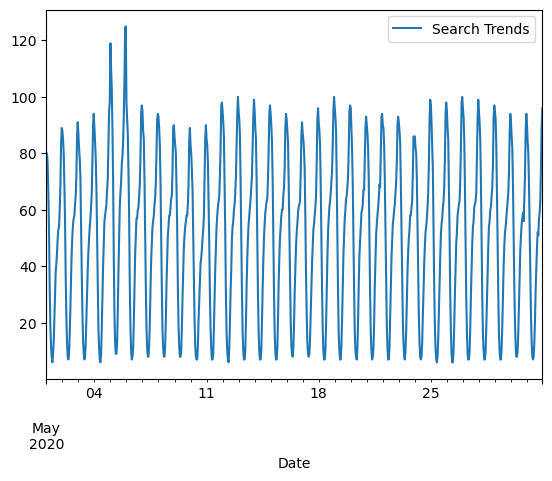

In [6]:
# Plot to visualize the data for May 2020
df_may_2020.plot()
# Slice the data to just the month of May 2020. -----------------------------------------------------------------------------------------------------------> (5 points)



#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [7]:
### Calculate the sum of the total search traffic for May 2020
# Search Trends    38181
# dtype: int64

traffic_may_2020 = float(df_may_2020["Search Trends"].sum())
# Calculate the total search traffic for the month.------------------------------------------------------------------------------------------------------> (5 points)


### View the traffic_may_2020 value
traffic_may_2020

38181.0

In [8]:
# median_monthly_traffic = df_mercado_trends
df_mercado_trends


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


In [9]:
# NDB - Checking date type
temp_df = df_mercado_trends
temp_df = temp_df.reset_index()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37106 entries, 0 to 37105
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           37106 non-null  datetime64[ns]
 1   Search Trends  37106 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 579.9 KB


In [10]:
### Calcluate the monhtly median search traffic across all months
# Search Trends    35172.5
# dtype: float64


### Group the DataFrame by index year and then index month, chain the sum and then the median functions

# --> M08D02A03 block #10 --> "chain" --> it means to 'dot' together a whole bunch of functions
# median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month,]).sum().median()
median_monthly_traffic = df_mercado_trends.groupby([pd.Grouper(freq='YE'), pd.Grouper(freq='ME')]).sum().median()
# Pull year, then pull month inside group
#    THEN → chain sum
#       THEN chain median


### View the median_monthly_traffic value
median_monthly_traffic

Search Trends    35172.5
dtype: float64

In [11]:
### Compare the seach traffic for the month of May 2020 to the overall monthly median value
# Search Trends    1.085536
# dtype: float64

Comparison_part_1 = traffic_may_2020 / median_monthly_traffic
Comparison_part_1

# Compare the value to the monthly median across all months. --------------------------------------------------------------------------------------> (5 points)


Search Trends    1.085536
dtype: float64

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**
→ Yes.  It increased 8% when compaired to the median monthy traffic. 
----------------------------------------------------------------------------------------(5 Points)

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

In [15]:
# df_mercado_trends

<Axes: xlabel='Date'>

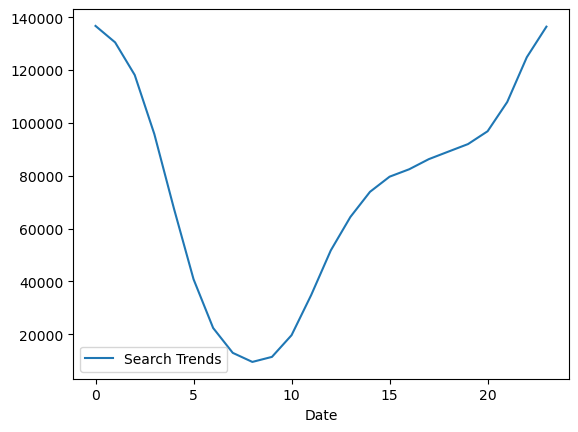

In [12]:
### Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`


df_h = df_mercado_trends.groupby(df_mercado_trends.index.hour).sum()
df_h.plot()
# Group the hourly search data to plot the average traffic by the hour of day. ------------------------------------------------------------> (5 points)








In [13]:
# South America - GMT(-5), (-4), (-3) 
# https://www.timeanddate.com/time/map/
# https://luminocity3d.org/WorldPopDen/#4/-21.33/-66.40
# ---> Highest populations densities are in the (GMT-3) region
#   ----> "Time of day" is this graph adjusted back 3h

df_h

# "Low" is @ 5*, 4, or 3 AM, highest population density has it @ 5

,Search Trends
Date,
0,136726
1,130495
2,118145
3,95781
4,67592
5,40825
6,22355
7,12943
8,9509


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='day'>

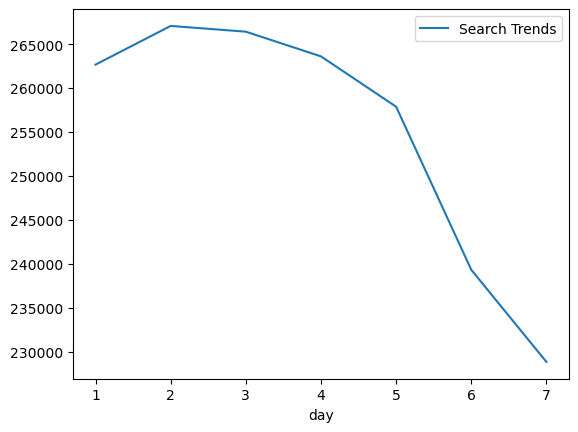

In [14]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

df_dotw = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).sum()
df_dotw.plot()
# Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). -----------------------------------> (5 points)
# ISO 8601 → {1:"M", 2:"T", 3:"W", 4:"R", 5:"F", 6:"Sa", 7:"Su"}


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='week'>

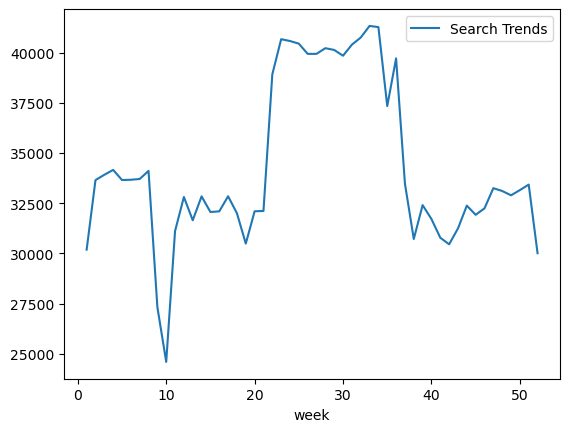

In [15]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

df_woty = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).sum()
df_woty.plot()
# Group the hourly search data to plot the average traffic by the week of the year. -----------------------------------------------------------------> (5 points)


# Week 10 → 3/4  - March
#                  Lent (2024) → Mar 5 - Apr 17
# Week 20 → 5/13 - May
# Week 35 → 8/26 - aug


In [16]:
df_mercado_trends.sort_index()
df_mercado_trends

#  Multiply years of data is in thethe data set



,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?  ------------------------------------------------------------------------------------> (5 points)

**Answer:**  
1) <u>Hour of Day</u> : The data provided did not include any offset for time zone, so I assumed that that it is given in GMT.  South America is at (-3), (-4), and (-5), with the highest population density in (-3).  Adjusting back 3h, the peek rise in searches start at (21-3 = 18) 6pm local time.  Assuming the standard business  day (9a-5p), this would put the main traffic generated after the standard work day (assuming a sufficient lag to needed to complete a commute or other duties).  The step increase may be due to the inclusion of subsequent time zones.

<a href="https://www.timeanddate.com/time/map/" style="font-size: 16px;">Time Zones</a>  
<a href="https://luminocity3d.org/WorldPopDen/#4/-21.33/-66." style="font-size: 16px;">Pop Density Heat Map</a>
  
2) <u>Day of the Week</u> : Most searches were compleated M-F.  
  
3) <u>Week of the Year</u> :  
**[Week 10 Spike]** - There is a spike drop at the beginning of March. With the abruptness of the shift, this would indicate that the shift is due to an event with a hard start/end date.  This time period coincides with Lent (a period of fasting and restraint for several elements in the Christian religion).  
**[Week 20-35]** - A positive spike occurs in Week 20 (Mid May) and then returns almost exactly to the initial level in week 35 (End of August).  With the same abrupt shift, this seems to be a "hard Date" switch, more than a general trend.  These dates coincide with the start and end of the academic school year in most communities.   



## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [17]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

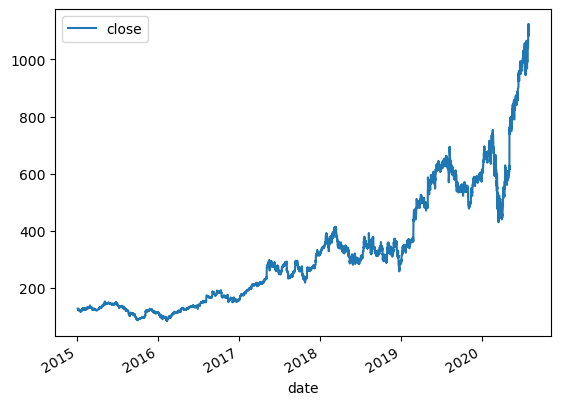

In [18]:
# Visualize the closing price of the df_mercado_stock DataFrame

df_mercado_stock.plot()
# Read in and plot the stock price data. ----------------------------------------------------------------------------------------------------> (5 points)


In [19]:
display(df_mercado_stock.head(3))
display(df_mercado_stock.tail(1))
# df_mercado_stock (15_0102 → 20_0731)

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57


,close
date,
2020-07-31 15:00:00,1122.51


In [21]:
display(df_mercado_trends.head(3))
display(df_mercado_trends.tail(2))
# df_mercado_trends (16_0601 → 20_0908)

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76


,Search Trends
Date,
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [22]:
### Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
### Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

# df_mercado_stock (15_0102 → 20_0731)
# df_mercado_trends (16_0601 → 20_0908)

df_mercado_s_t = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()
# Concatenate the stock price data to the search data in a single DataFrame. ------------------------------------------------------------------------> (5 points)

### View the first and last five rows of the DataFrame
display(df_mercado_s_t.head(5))
display(df_mercado_s_t.tail(5))

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [23]:
### For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)

# B08D02A03
df_s_t_2020a = df_mercado_s_t.loc["2020-01":"2020-06"]

### View the first and last five rows of first_half_2020 DataFrame
display(df_s_t_2020a.head(5))
display(df_s_t_2020a.tail(5))
# Slice the data to just the first half of 2020 (2020-01 to 2020-06 in the DataFrame), and then plot the data. -------------------------------------------------------------> (5 points)


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

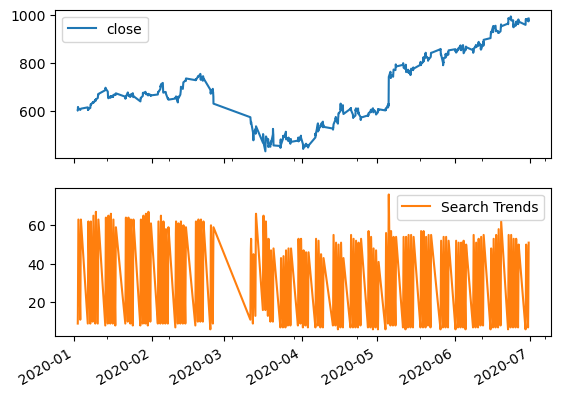

In [24]:
### Visualize the close and Search Trends data
### Plot each column on a separate axes using the following syntax
### `plot(subplots=True)`

df_s_t_2020a.plot(subplots=True)

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**  
There does seem to be a slight trend, of both the # of searches and stock price dropping off after the break in March.  
  
The trend after that, though, seems to be disconnected.  While the stock price continues to rise (linear, positive slope), the number of searches approaches the previous nominal limit (asymptotic).  

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [25]:
df_mercado_s_t.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7067 entries, 2016-06-01 09:00:00 to 2020-07-31 15:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          7067 non-null   float64
 1   Search Trends  7067 non-null   float64
dtypes: float64(2)
memory usage: 423.7 KB


In [75]:
#                       close	Search Trends
# 2016-06-01 09:00:00	135.160	6.0
# 2016-06-01 10:00:00	136.630	12.0
# 2016-06-01 11:00:00	136.560	22.0
# 2016-06-01 12:00:00	136.420	33.0
# 2016-06-01 13:00:00	136.100	40.0






DatetimeIndex(['2016-06-01 09:00:00', '2016-06-01 10:00:00',
               '2016-06-01 11:00:00', '2016-06-01 12:00:00',
               '2016-06-01 13:00:00', '2016-06-01 14:00:00',
               '2016-06-01 15:00:00', '2016-06-02 09:00:00',
               '2016-06-02 10:00:00', '2016-06-02 11:00:00',
               ...
               '2020-07-30 13:00:00', '2020-07-30 14:00:00',
               '2020-07-30 15:00:00', '2020-07-31 09:00:00',
               '2020-07-31 10:00:00', '2020-07-31 11:00:00',
               '2020-07-31 12:00:00', '2020-07-31 13:00:00',
               '2020-07-31 14:00:00', '2020-07-31 15:00:00'],
              dtype='datetime64[ns]', length=7067, freq=None)

In [26]:
### Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
### This column should shift the Search Trends information by one hour

#                       close	Search Trends
# 2016-06-01 09:00:00	135.160	6.0
# 2016-06-01 10:00:00	136.630	12.0 ---> 6.0
# 2016-06-01 11:00:00	136.560	22.0
# 2016-06-01 12:00:00	136.420	33.0
# 2016-06-01 13:00:00	136.100	40.0

df_mercado_s_t["Lagged Search Trends"] = df_mercado_s_t["Search Trends"].shift(periods=1, freq='h')
# Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. -----------------------------------------------------------> (5 points)
df_mercado_s_t


,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.160,6.0,NaN
2016-06-01 10:00:00,136.630,12.0,6.0
2016-06-01 11:00:00,136.560,22.0,12.0
2016-06-01 12:00:00,136.420,33.0,22.0
2016-06-01 13:00:00,136.100,40.0,33.0
...,...,...,...
2020-07-31 11:00:00,1105.780,20.0,11.0
2020-07-31 12:00:00,1087.925,32.0,20.0
2020-07-31 13:00:00,1095.800,41.0,32.0
2020-07-31 14:00:00,1110.650,47.0,41.0


In [27]:
### Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
### This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

# Ino from Sean
# mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()


# Hand calculating the first 4 values (postion [0] is NaN)
# 135.16	NaN             Skip        
# 136.63	1.039446968	    Skip        
# 136.56	0.8292365967	Skip        <Target>
# 136.42	0.6938479661	Correct	    0.006134
# 136.1		0.2351418012	Correct	    ???????

# Modual inclues the requirement that the StDev be exponentially weighted.

# df_mercado_s_t['Stock Volatility'] = df_mercado_s_t['close'].rolling(window='4h', min_periods=4).std()
# df_mercado_s_t['Stock Volatility'] = df_mercado_s_t['close'].ewm(span=4, min_periods=4).std()
df_mercado_s_t['Stock Volatility'] = df_mercado_s_t['close'].pct_change().rolling(window=4).std()
# “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility. ----------------------------------> (5 points)

df_mercado_s_t


,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.160,6.0,NaN,NaN
2016-06-01 10:00:00,136.630,12.0,6.0,NaN
2016-06-01 11:00:00,136.560,22.0,12.0,NaN
2016-06-01 12:00:00,136.420,33.0,22.0,NaN
2016-06-01 13:00:00,136.100,40.0,33.0,0.006134
...,...,...,...,...
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001


<Axes: >

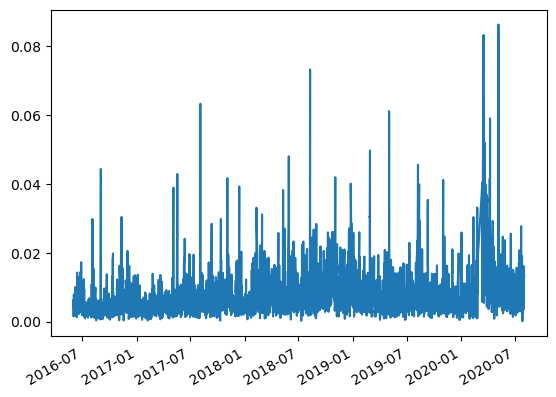

In [28]:
# Visualize the stock volatility
df_mercado_s_t['Stock Volatility'].plot()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [30]:
### Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
### This column should calculate hourly return percentage of the closing price


# df_pct_change = df_hourly['price col'].pct_change()
df_mercado_s_t['Hourly Stock Return'] = df_mercado_s_t['close'].pct_change()
# “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis. --------------------------------------------------------> (5 points)


In [31]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_s_t.head(5))
display(df_mercado_s_t.tail(5))

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

<Axes: >

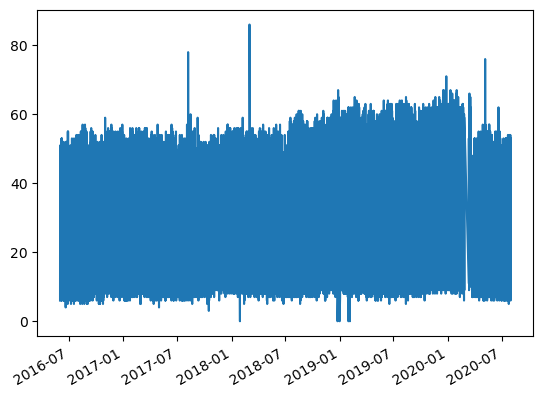

In [44]:
df_mercado_s_t["Search Trends"].plot()

In [32]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_s_t[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# 0.50 → 1.00 : Strong
# 0.30 → 0.49 : Moderate
# 0.0+ → 0.29 : Low
# 0.00 : None

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.220319,0.061424
Lagged Search Trends,-0.220319,1.000000,-0.005230
Hourly Stock Return,0.061424,-0.005230,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**  
If there is, it is very slight.  The Pearson Correlation Coefficient is well below 0.1 between Stock Volatility and Hourly Stock Returns.  The correlation between Hourly Volatility and Lagged Search Trends is higher, but in some ways measure the same thing (most recent shifts in value).  It still very low, as there is not dependancy between past and future stock prices.  
  
Write your answer in the space provided in the starter file. -----------------------------------------------------------------------------------------> (5 points)

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [33]:
df_mercado_trends

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


In [34]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = df_mercado_trends.rename(columns={
    "Date":"ds",
    "Search Trends":"y",
})

# Drop an NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head(5))
display(prophet_df.tail(5))

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [35]:
# Call the Prophet function, store as an object
# M08D03A02
model_prophet = Prophet()


In [36]:
### Fit the time-series model.
# DEBUG:cmdstanpy:input tempfile: /tmp/tmpi4kzua4v/947z_5gs.json
# DEBUG:cmdstanpy:input tempfile: /tmp/tmpi4kzua4v/s3y_2bzt.json
# DEBUG:cmdstanpy:idx 0
# DEBUG:cmdstanpy:running CmdStan, num_threads: None
# DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80278', 'data', 'file=/tmp/tmpi4kzua4v/947z_5gs.json', 'init=/tmp/tmpi4kzua4v/s3y_2bzt.json', 'output', 'file=/tmp/tmpi4kzua4v/prophet_model9pwhgaux/prophet_model-20240408214021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
# 21:40:21 - cmdstanpy - INFO - Chain [1] start processing
# INFO:cmdstanpy:Chain [1] start processing
# 21:40:49 - cmdstanpy - INFO - Chain [1] done processing
# INFO:cmdstanpy:Chain [1] done processing
model_prophet.fit(prophet_df)


22:19:27 - cmdstanpy - INFO - Chain [1] start processing
22:19:47 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
### Create a future dataframe to hold predictions
### Make the prediction go out as far as 2000 hours (approx 80 days)
# 39101	2020-11-30 04:00:00
# 39102	2020-11-30 05:00:00
# 39103	2020-11-30 06:00:00
# 39104	2020-11-30 07:00:00
# 39105	2020-11-30 08:00:00
future_mercado_trends = model_prophet.make_future_dataframe(periods=2000, freq="h")
# Set up the Google search data for a Prophet forecasting model. ----------------------------------------------------------------------------------------> (5 points)

### View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail(5)


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [39]:
### Make the predictions for the trend data using the future_mercado_trends DataFrame
# 	ds	trend	yhat_lower	yhat_upper	trend_lower	trend_upper	additive_terms	additive_terms_lower	additive_terms_upper	daily	...	weekly	weekly_lower	weekly_upper	yearly	yearly_lower	yearly_upper	multiplicative_terms	multiplicative_terms_lower	multiplicative_terms_upper	yhat
# 0	2016-06-01 00:00:00	44.469500	80.657755	98.092527	44.469500	44.469500	45.159722	45.159722	45.159722	41.452703	...	1.860594	1.860594	1.860594	1.846426	1.846426	1.846426	0.0	0.0	0.0	89.629222
# 1	2016-06-01 01:00:00	44.470406	77.585016	94.403906	44.470406	44.470406	41.605529	41.605529	41.605529	37.943556	...	1.810498	1.810498	1.810498	1.851474	1.851474	1.851474	0.0	0.0	0.0	86.075935
# 2	2016-06-01 02:00:00	44.471312	67.254855	83.562064	44.471312	44.471312	31.282049	31.282049	31.282049	27.656646	...	1.768912	1.768912	1.768912	1.856491	1.856491	1.856491	0.0	0.0	0.0	75.753361
# 3	2016-06-01 03:00:00	44.472218	52.594834	69.279039	44.472218	44.472218	16.014826	16.014826	16.014826	12.417424	...	1.735926	1.735926	1.735926	1.861476	1.861476	1.861476	0.0	0.0	0.0	60.487045
# 4	2016-06-01 04:00:00	44.473124	34.860822	51.829818	44.473124	44.473124	-1.100073	-1.100073	-1.100073	-4.677999	...	1.711496	1.711496	1.711496	1.866430	1.866430	1.866430	0.0	0.0	0.0	43.373051
# 5 rows × 22 columns
forcast_mercado_trends = model_prophet.predict(future_mercado_trends)



# Display the first five rows of the forecast_mercado_trends DataFrame
forcast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,80.703588,98.323782,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,77.462143,94.673099,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.411361,84.338256,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,51.319095,68.824583,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,35.723968,51.556186,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


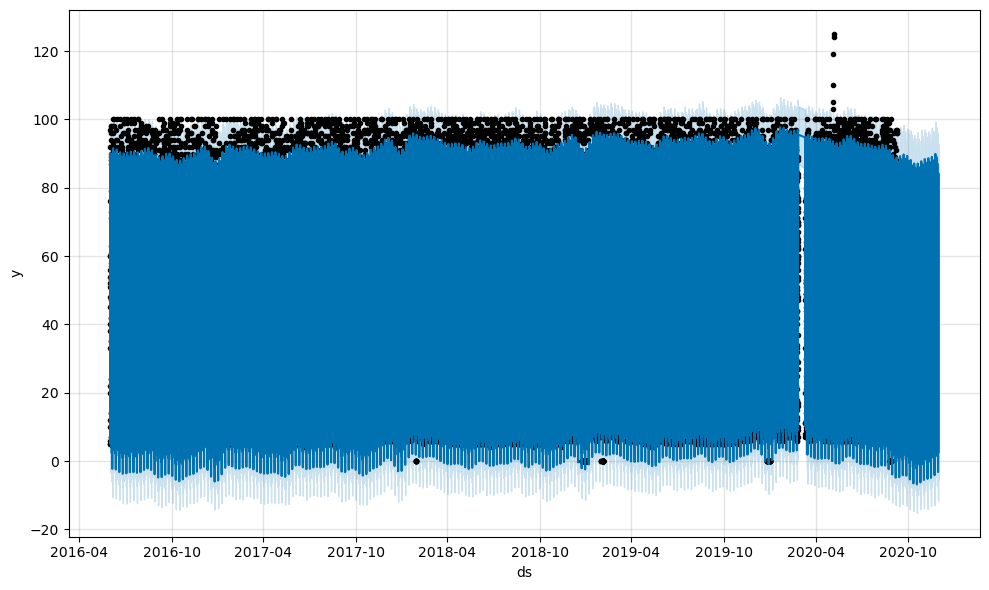

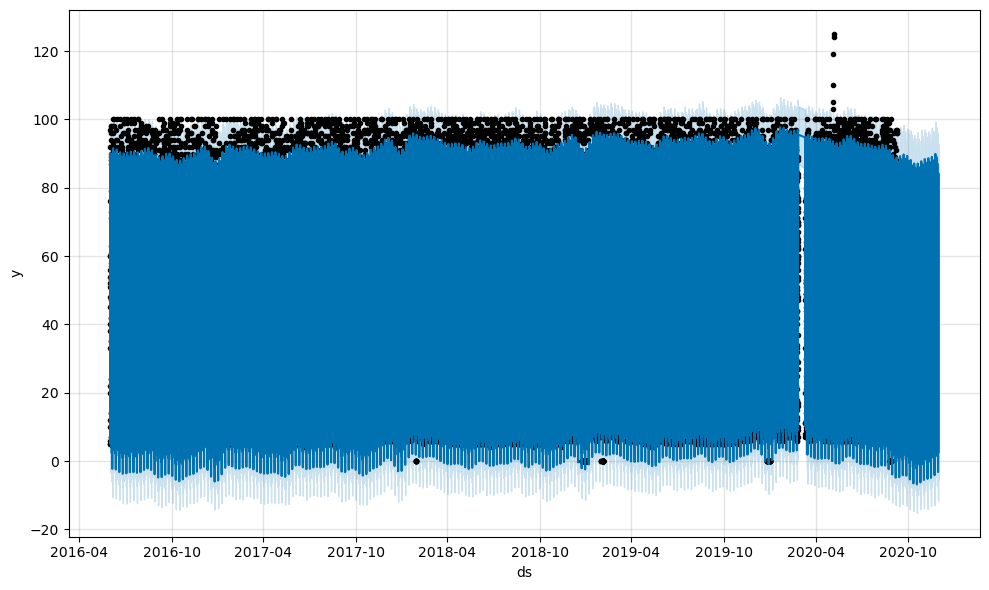

In [40]:
# Plot the Prophet predictions for the Mercado trends data
model_prophet.plot(forcast_mercado_trends)
#       m    .plot(     forecast         )

# After estimating the model, plot the forecast. --------------------------------------------------------------------------------------------------------> (5 points)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**  
The model is based off of the most recent data, including the recent drop-of in 2020.  According to the model, the drop will stall half way through the analysis period and start trending its way back up.
 

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [48]:
# 	                    yhat	    yhat_lower	yhat_upper
# ds			
# 2016-06-01 00:00:00	89.629222	80.657755	98.092527
# 2016-06-01 01:00:00	86.075935	77.585016	94.403906
# 2016-06-01 02:00:00	75.753361	67.254855	83.562064
# 2016-06-01 03:00:00	60.487045	52.594834	69.279039
# 2016-06-01 04:00:00	43.373051	34.860822	51.829818

### Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forcast_mercado_trends_2 = forcast_mercado_trends[["ds","yhat", "yhat_lower", "yhat_upper"]].set_index("ds")
forcast_mercado_trends_2
### View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame



,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,80.703588,98.323782
2016-06-01 01:00:00,86.106654,77.462143,94.673099
2016-06-01 02:00:00,75.784037,67.411361,84.338256
2016-06-01 03:00:00,60.517701,51.319095,68.824583
2016-06-01 04:00:00,43.403713,35.723968,51.556186
...,...,...,...
2020-11-30 04:00:00,39.507473,31.116578,48.051874
2020-11-30 05:00:00,24.036286,15.652342,32.135082
2020-11-30 06:00:00,12.070566,3.671970,20.843935


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

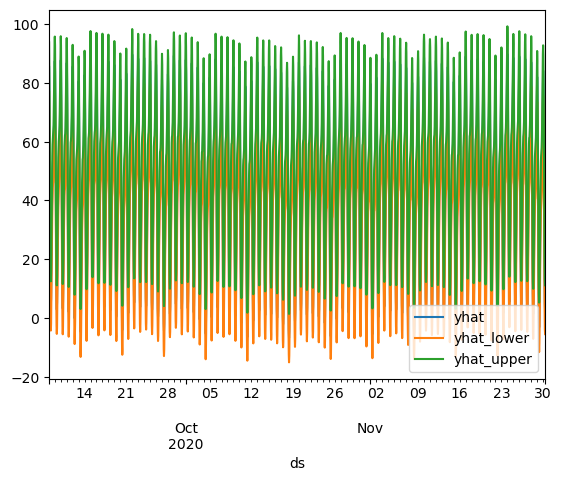

In [49]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forcast_mercado_trends_2[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].plot()
# Plot the individual time series components of the model. -----------------------------------------------------------------------------------------------> (5 points)

c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\forgo\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

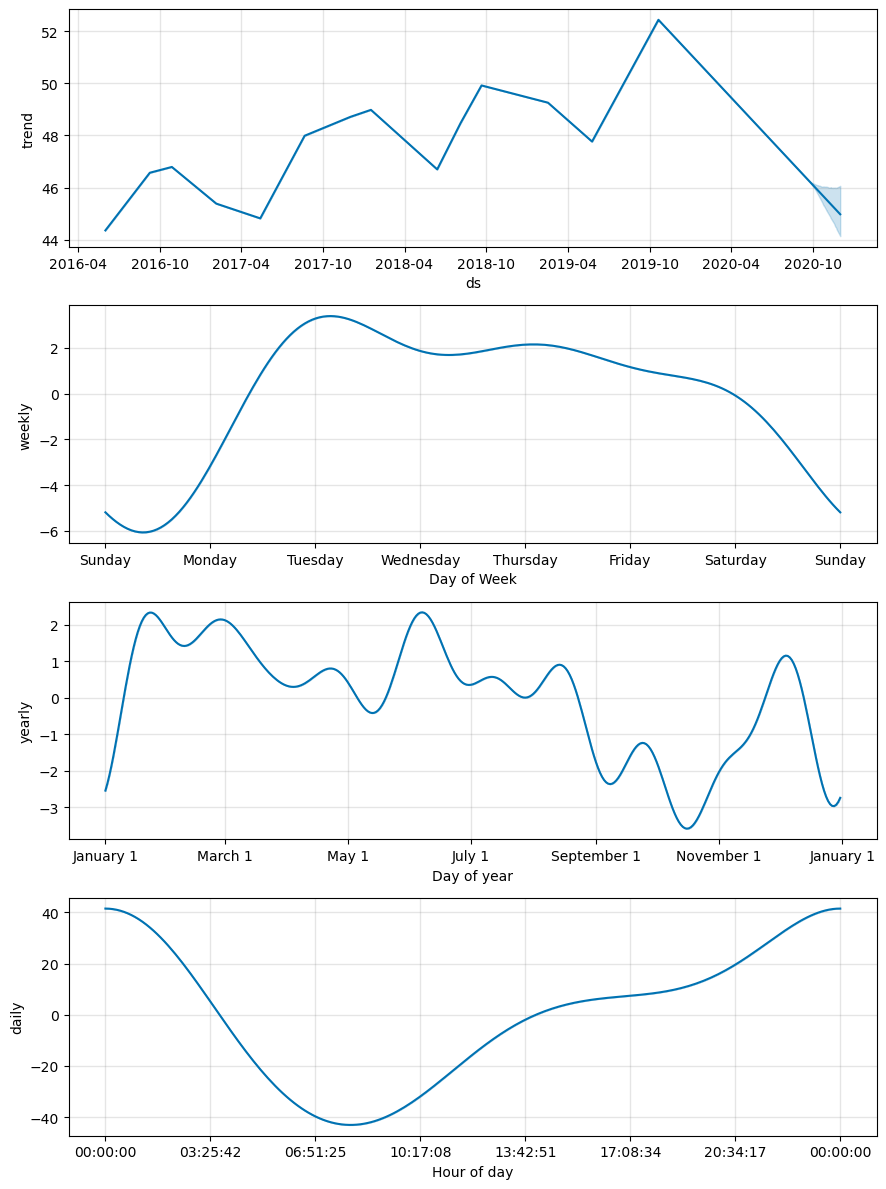

In [51]:
# Reset the index in the forecast_mercado_trends DataFrame
forcast_mercado_trends_3 = forcast_mercado_trends_2.reset_index()

# Use the plot_components function to visualize the forecast results for the forecast_canada DataFrame
fig = model_prophet.plot_components(forcast_mercado_trends)

In [53]:
forcast_mercado_trends_2[]


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,80.703588,98.323782
2016-06-01 01:00:00,86.106654,77.462143,94.673099
2016-06-01 02:00:00,75.784037,67.411361,84.338256
2016-06-01 03:00:00,60.517701,51.319095,68.824583
2016-06-01 04:00:00,43.403713,35.723968,51.556186
...,...,...,...
2020-11-30 04:00:00,39.507473,31.116578,48.051874
2020-11-30 05:00:00,24.036286,15.652342,32.135082
2020-11-30 06:00:00,12.070566,3.671970,20.843935


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**  
24:00:00.  This may be adjusted to local time, as needed (see above).

**Question:** Which day of week gets the most search traffic?
   
**Answer:**  
Tuesday.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**  
Half way through October.
